<a href="https://colab.research.google.com/github/srt3000/CE888/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import precision_score, recall_score, roc_curve
from sklearn.feature_selection import RFECV

In [60]:
d = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")
df = d.copy()
df
print('rows with null values: ' ,df.isnull().sum().sum())


rows with null values:  0


In [3]:
#using label encoder to convert label into number
#df[["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome","y"]] = df[["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome","y"]].apply(LabelEncoder().fit_transform)
Y = df[["y"]].apply(LabelEncoder().fit_transform)
print(Y)
print(df)


       y
0      0
1      0
2      0
3      0
4      0
...   ..
41183  1
41184  0
41185  0
41186  1
41187  0

[41188 rows x 1 columns]
       age          job  marital  ... euribor3m nr.employed    y
0       56    housemaid  married  ...     4.857      5191.0   no
1       57     services  married  ...     4.857      5191.0   no
2       37     services  married  ...     4.857      5191.0   no
3       40       admin.  married  ...     4.857      5191.0   no
4       56     services  married  ...     4.857      5191.0   no
...    ...          ...      ...  ...       ...         ...  ...
41183   73      retired  married  ...     1.028      4963.6  yes
41184   46  blue-collar  married  ...     1.028      4963.6   no
41185   56      retired  married  ...     1.028      4963.6   no
41186   44   technician  married  ...     1.028      4963.6  yes
41187   74      retired  married  ...     1.028      4963.6   no

[41188 rows x 21 columns]


In [61]:
#perform one hot encoding to categorical attributes
df_dummies = pd.get_dummies(df,columns=["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"])
df_dummies





,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [62]:
#Column "duration" must be deleted, drop the categorical values in df andCombine the dummies
# combine all the x values to x
#drop the duration 
#df.drop('duration',axis=1, inplace=True)
df_dummies.drop('y',axis=1, inplace=True)
df_dummies.drop('duration',axis=1, inplace=True)
#Check if there are any missing values in the dataset. If there are, drop the rows.
df_dummies.dropna(axis=0, how='any', inplace=True)
list(df_dummies)
print(df_dummies)
print(df_dummies.size)






       age  campaign  ...  poutcome_nonexistent  poutcome_success
0       56         1  ...                     1                 0
1       57         1  ...                     1                 0
2       37         1  ...                     1                 0
3       40         1  ...                     1                 0
4       56         1  ...                     1                 0
...    ...       ...  ...                   ...               ...
41183   73         1  ...                     1                 0
41184   46         1  ...                     1                 0
41185   56         2  ...                     1                 0
41186   44         1  ...                     1                 0
41187   74         3  ...                     0                 0

[41188 rows x 62 columns]
2553656


(41188, 1)


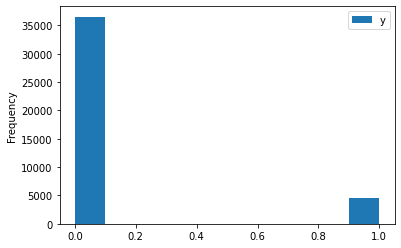

In [33]:
#Plot histogram of the label and calculate the imbalance in the dataset.
Y.plot.hist()
print(Y.shape)

#so we can see the imbalance in the dataset, 0 has 350000 values while 1 has 5000 values

In [51]:
#Use test train split to split the data for train and test
#stratify =y  to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.

x_train, x_test, y_train, y_test = train_test_split(df_dummies, Y,  test_size=0.20, random_state=50,stratify=Y)
# Fitting Random Forest Classification to the Training set



In [50]:
# Fitting Random Forest Classification to the Training set,  10-fold stratified cross-validation on the training set using a random forest classifier with 100 trees and depth=3.
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
scoring = {'accuracy' : make_scorer(accuracy_score), 'precision' : make_scorer(precision_score), 'recall' : make_scorer(recall_score), 'f1_score' : make_scorer(f1_score)}
kfold = model_selection.KFold(n_splits=10,shuffle= True, random_state=50)
model_kfold = RandomForestClassifier(n_estimators = 100, max_depth=3, random_state =50)
model_kfold.fit(x_train,y_train)
print( model_selection.cross_val_score(model_kfold, x_train, y_train, cv=kfold, scoring= 'f1'))

print(results_kfold) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

[0.25494505 0.22869023 0.21077283 0.22276029 0.29580574 0.248307
 0.26666667 0.28077754 0.27096774 0.28571429]
F1 s:


In [57]:
#Compare the results of your classifier with that of a dummy classifier.
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(x_train,y_train)
f1_score = cross_val_score(dummy_clf, x_train, y_train, scoring="f1",cv=10)
print('F1 score mean of the results is : {f1_score.mean()}')
print("Dummy ACC: %.2f" % precision_score(y_test, dummy_clf.predict(x_test)))

F1 score for each fold are: 0.10225167802015925
Dummy ACC: 0.11


In [ ]:
#use GridSearchCV to find a better set of parameters for your random forest.
from sklearn.model_selection import GridSearchCV
def print_results(results):   #to print all the results
    print('BEST PARAMETERS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

params= {'max_depth': [10,20], 'max_features' : [2,3], 'min_samples_leaf':[2,4], 'n_estimators' : [5,50,100,120,150,200] }

cv = GridSearchCV(model_kfold, param_grid= params,scoring='accuracy', cv=5) #rf= randomforest classifier
cv.fit(x_train, y_train)
print_results(cv)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
#use GridSearchCV to find a better set of parameters for your random forest.


# Number of trees in random forest
n_estimators = [80, 100, 120]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5, 10, 20]

# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
              #  'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
                'random_state': [50],
              
              #  'bootstrap': bootstrap
              }

print(param_grid)

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestClassifier(), param_grid)
clf.fit(x_train, y_train)

In [58]:
#use GridSearchCV to find a better set of parameters for your random forest.


# Number of trees in random forest
n_estimators = [250]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [6]

# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
              #  'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
                'random_state': [50],
              
              #  'bootstrap': bootstrap
              }

print(param_grid)

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestClassifier(), param_grid)
clf.fit(x_train, y_train)

{'n_estimators': [250], 'max_depth': [6], 'min_samples_split': [2, 5, 10], 'random_state': [50]}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
 print('BEST PARAMS: {}\n'+sclf.best_params_))

In [ ]:
 from sklearn.feature_selection import RFECV
 rfecv = RFECV(estimator=model_best, 
              step=1, 
              cv=5, 
              scoring = 'roc_auc')
rfecv.fit(X_train, Y_train)
rfecv
rfecv.ranking_

In [ ]:
{         #keys of this dictionary should align with name of hyperparameters that is passed to rf classifier
    'n_estimators': [5, 50, 250], # test by building 5,50,250 decision trees
    'max_depth': [2, 4, 8, 16, 32, None] #max depth of decision trees made from above command, none lets tree go deeper as it wants until it reaches some level of tolerance
}